# 자연어 처리 시작하기

설치 목록
- JDK (Java SE Downloads)
- JAVA_HOME 설정
- JPype 설치
- KoNLPy 설치
- Word Cloud 설치

In [1]:
import scipy as sp
import pandas as pd
import numpy as np

## 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치
- KoNLPy : pip install konlpy
- JPype1 : conda install -c conda-forge jpype1
- 이후 Jupyter Notebook 재실행 필요
- JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치
- JAVA_HOME 설정 : 교재내용 참조

## 한글 자연어 처리 기초

### 꼬꼬마

In [19]:
from konlpy.tag import Kkma
kkma = Kkma()

In [20]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [21]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [26]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

### 한나눔

In [64]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [65]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [66]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

### Okt(구 twitter)

In [27]:
from konlpy.tag import Okt
t = Okt()

In [28]:
# 명사 분석
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [29]:
# 형태소 분석
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 워드 클라우드

In [30]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

## Naive Bayes Classifier의 이해 - 영문

In [2]:
from nltk.tokenize import word_tokenize
import nltk

## Naive Bayes Classifier의 이해 - 한글

In [32]:
from konlpy.tag import Okt

In [33]:
pos_tagger = Okt()

In [34]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [35]:
# 말뭉치를 만들어 보자.
all_words = set(word.lower() for sentence in train
                                 for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [36]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                               for x in train]
t

[({'이쁜': False,
   '놀거야': False,
   '메리가': True,
   '메리는': False,
   '수업이': False,
   '메리랑': False,
   '지루해': False,
   '좋아': True,
   '고양이도': False,
   '마치고': False,
   '난': False,
   '고양이야': False},
  'pos'),
 ({'이쁜': False,
   '놀거야': False,
   '메리가': False,
   '메리는': False,
   '수업이': False,
   '메리랑': False,
   '지루해': False,
   '좋아': True,
   '고양이도': True,
   '마치고': False,
   '난': False,
   '고양이야': False},
  'pos'),
 ({'이쁜': False,
   '놀거야': False,
   '메리가': False,
   '메리는': False,
   '수업이': True,
   '메리랑': False,
   '지루해': True,
   '좋아': False,
   '고양이도': False,
   '마치고': False,
   '난': True,
   '고양이야': False},
  'neg'),
 ({'이쁜': True,
   '놀거야': False,
   '메리가': False,
   '메리는': True,
   '수업이': False,
   '메리랑': False,
   '지루해': False,
   '좋아': False,
   '고양이도': False,
   '마치고': False,
   '난': False,
   '고양이야': True},
  'pos'),
 ({'이쁜': False,
   '놀거야': True,
   '메리가': False,
   '메리는': False,
   '수업이': False,
   '메리랑': True,
   '지루해': False,
   '좋아': False,
   '고양이도': False,
   '마치고'

## train 문장별 감성분석  (tokenize 함수 이용해 한글 형태소분석)

In [37]:
# tokenize 함수를 이용해 train 감성분석
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [38]:
# 문장별 pos / neg 판단
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [39]:
# 전체 말뭉치도 만듦
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

### 말뭉치에 있는 단어 유무 구분하는 함수 만들어서 train 문장에 적용

In [40]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [41]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

### 분류기 작동

In [42]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [43]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [44]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [45]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [46]:
classifier.classify(test_sent_features)

'pos'

## 문장의 유사도 측정(TFIDF)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
vectorizer = CountVectorizer(min_df = 1)

In [53]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
            '메리는 공원에서 산책하고 노는 것을 싫어해요',
            '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
            '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [74]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [75]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [76]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [77]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [78]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [79]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [80]:
from konlpy.tag import Okt
t = Okt()

In [81]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [82]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [83]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [84]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [85]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [86]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [87]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [88]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [89]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [90]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [91]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [92]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [93]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [94]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [95]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


# ★TFIDF 개념으로 유사한 문장 찾기

In [ ]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf, idf

In [97]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [98]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [100]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [101]:
vectorizer.get_feature_names()


['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [102]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [103]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [104]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=0.90   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.18   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


#### 결론 : '근처 공원에 메리랑 놀러가고 싶네요.' 와 유사한 문장으로 '메리랑 놀러가고 싶지만 바쁜데 어떻하죠?'를 찾았다.

##  여자친구 선물 추천

In [106]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

# 그래프에 대한 import
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [107]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))
soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [109]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    크리스마스 여친 선물   크리스마스 목걸이   세남자바스켓 마리모   맥앤로건 향수   여친선물추천   샤넬 립밤   여친 생일선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  크리스마스 고2 여친 선물   2017.12.19.   제가 100일정도 사귀다 헤어졋다 다니만난지 10일도 안됫는데 크리스마스가 다가오네요 선물을 뭘 줘야할지 너무 거창한건 말고 추천해주세요 손편지도 같이 줄라구요   답변 안녕하세요 ? 큰선물은 서로가 부담 입니다 핸드크림 목도리 장갑 귀마개 털실내화 틴트 디퓨져 털모자 향수 악세사리 이런것들 어떨까 싶네요 작은 손편지도 괜찮지만 같이...      ',
 '  질문  빼빼로데이 여친 선물 추천 어떤게 좋을까요?   2018.10.15.   어떻게 선택을 해야 할지를 모르는데 빼빼로데이 여친선물 추천 부탁드립니다. 처음 여친을 사귀는 거라 어떤것을 해야 할지를 모르겠네요.   답변 빼빼로데이 여친 선물 추천 때문에 질문을 주신거 같으신데요.. 찾아보시면은 빼빼로데이 여친 선물 추천 드리고... 빼빼로데이 다가오면은 여친 선물 하려고 준비를 하는...      ',
 '  질문  헤어진 전여친 선물   2018.01.10.   제목 그대로 헤어진 전 여자친구에게 선물을 전해주고싶어 글 올립니다. 8개월간 만난 여자친구와 헤어진지 8일이 지났는데 여자친구가 스트레스로 인해 피부가 많이...   답변 그냥 주지 마세요 헤어졌는데 뭘 줍니까      ',
 '  질문  화이트데이 여친선물 추천좀해주세요   2018.03.06.   이제 곧 화이트데이잖아요 그래서 화이트데이 여친선물.

In [110]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [111]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구 생일선물   여자 근력운동   여자친구 100일 선물   10대 여자친구 선물   와일드망고   친구 선물   여자친구 목걸이   스킨케어   여자스킨로션추천   여자 30대 선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  여자친구선물 괜찮은거 있어요? (30대 전후)   2018.10.29.   생각나는 여자친구선물이 없네요ㅠ 저는 가격은 큰 상관없지만 이번생일에는 특별하고 간직할 만한 여자친구선물이면 좋을거같아요. 여자친구선물 추천 좀 꼭...   답변 벌써 여자친구선물을 사야할 때가왔나? 그래도 마음을... 보다 여자친구선물로 높은 선호도가 있어요. 전... 노미네이션을 여자친구선물로 추천하는 이유는 여친과의...      ',
 '  질문  여자친구선물 때문에 질문 드릴게요   2018.11.22.   20대 후반 동갑내기 커플인데요~ 이번에 1주년 기념으로 여자친구선물 해주고 싶은데, 일단 생각해둔 건 반지나 목걸이 같은 주얼리입니다. 자금이 많이 여유로운 건 아니라...   답변 여자친구선물로 주얼리를 생각 중이신가봐요^^ 아무래도 주얼리는 가격대가... 여자친구선물로 주얼리 구입을 생각 중이시라면 아페라모를 한번 알아보시길...      ',
 '  질문  여자친구 선물 예쁜거 추천해주세요   2018.10.29.   여자친구 선물로 고민이에요 달랑 과자만 주기에도 그렇고, 고급스러운 걸 같이 주려니... 여자친구 선물로... 과자랑 같이 줄만한 예쁜 여자친구 선물 좀 추천해주세요   답변 여자친구 선물로 뭘줄지 고민이신가보네요 ^^ 하긴... 있고, 여자친구 선물 고르기가 참 

In [112]:
len(present_candi_text)

1300

In [115]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [116]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

## 1만 개의 단어 형태소 분석으로 만든 token_ko

In [118]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '여자친구',
 '100일',
 '선물',
 '10',
 '대',
 '여자친구',
 '선물',
 '와일드',
 '망고',
 '친구',
 '선물',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '스킨로션',
 '추천',
 '여자',
 '30',
 '대',
 '선물',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '여자친구',
 '선물',
 '괜찮은',
 '거',
 '있어요',
 '?',
 '(',
 '30',
 '대',
 '전후',
 ')',
 '2018.10',
 '.',
 '29',
 '.',
 '생각나는',
 '여자친구',
 '선물',
 '이',
 '없네요',
 'ㅠ',
 '저',
 '는',
 '가격',
 '은',
 '큰',
 '상관없지만',
 '이번',
 '생일',
 '에는',
 '특별하고',
 '간',
 '직할',
 '만',
 '한',
 

In [120]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

85700
391


### -> 토큰으로 모은 단어는 85700개, 중복 단어 빼면 391개

## 많이 사용된 단어는 어떻게 될까?

In [124]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 4800),
 ('여자친구', 4200),
 ('.', 3400),
 ('...', 2300),
 ('로', 1500),
 ('가', 1400),
 ('대', 1400),
 ('질문', 1200),
 ('을', 1100),
 ('?', 1000),
 ('답변', 1000),
 ('20', 1000),
 ('도', 1000),
 ('를', 900),
 ('이', 900),
 ('은', 900),
 (',', 900),
 ('에', 800),
 ('요', 800),
 ('안녕하세요', 800),
 ('추천', 700),
 ('향수', 700),
 ('때', 600),
 ('여자', 600),
 ('목걸이', 600),
 ('중', 600),
 ('한', 500),
 ('단어', 500),
 ('는', 500),
 ('~', 500),
 ('랑', 500),
 ('시계', 500),
 ('검색', 400),
 ('하는', 400),
 ('의', 400),
 ('29', 400),
 ('저', 400),
 ('이번', 400),
 ('주얼리', 400),
 ('고민', 400),
 ('립스틱', 400),
 ('입력', 300),
 ('생일', 300),
 ('1', 300),
 ('거', 300),
 ('가격', 300),
 ('만', 300),
 ('2018.11', 300),
 ('인데', 300),
 ('생각', 300),
 ('나', 300),
 ('입니다', 300),
 ('^^', 300),
 ('걸', 300),
 ('같이', 300),
 ('좋을까요', 300),
 ('5만원', 300),
 ('말고', 300),
 ('들', 300),
 ('화이트데이', 300),
 ('사탕', 300),
 ('아리따움', 300),
 ('더', 300),
 ('포함', 200),
 ('기', 200),
 ('할', 200),
 ('사용', 200),
 ('개', 200),
 ('연관검색어', 200),
 ('30', 200),
 ('괜찮은', 200

In [125]:
ko.similar('여자친구')

In [126]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 4800),
 ('여자친구', 4200),
 ('안녕하세요', 800),
 ('추천', 700),
 ('향수', 700),
 ('여자', 600),
 ('목걸이', 600),
 ('랑', 500),
 ('시계', 500),
 ('검색', 400),
 ('29', 400),
 ('저', 400),
 ('이번', 400),
 ('주얼리', 400),
 ('고민', 400),
 ('립스틱', 400),
 ('입력', 300),
 ('생일', 300),
 ('가격', 300),
 ('만', 300),
 ('2018.11', 300),
 ('생각', 300),
 ('나', 300),
 ('입니다', 300),
 ('^^', 300),
 ('걸', 300),
 ('같이', 300),
 ('좋을까요', 300),
 ('5만원', 300),
 ('말고', 300),
 ('화이트데이', 300),
 ('사탕', 300),
 ('아리따움', 300),
 ('더', 300),
 ('포함', 200),
 ('기', 200),
 ('사용', 200),
 ('개', 200),
 ('연관검색어', 200),
 ('30', 200),
 ('괜찮은', 200),
 ('있어요', 200),
 ('2018.10', 200),
 ('전', 200),
 ('여친', 200),
 ('해주고', 200),
 ('건', 200),
 ('여유', 200),
 ('아니라', 200),
 ('이신가', 200)]

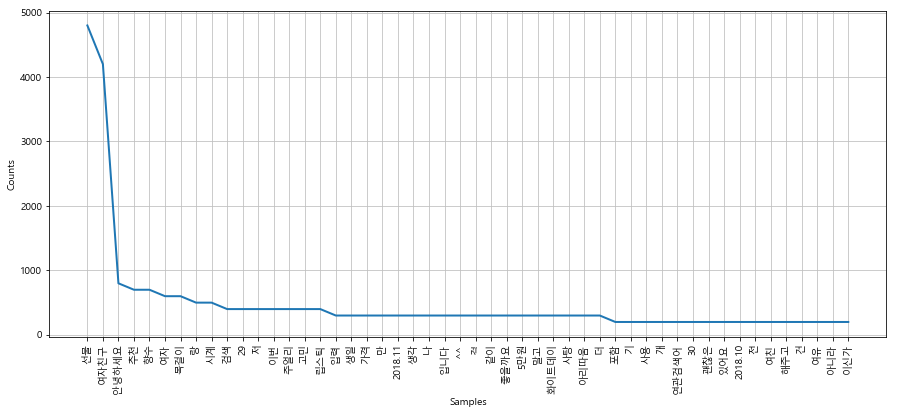

In [127]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [128]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [130]:
data = ko.vocab().most_common(300)
data

[('선물', 4800),
 ('여자친구', 4200),
 ('안녕하세요', 800),
 ('추천', 700),
 ('향수', 700),
 ('여자', 600),
 ('목걸이', 600),
 ('랑', 500),
 ('시계', 500),
 ('검색', 400),
 ('29', 400),
 ('저', 400),
 ('이번', 400),
 ('주얼리', 400),
 ('고민', 400),
 ('립스틱', 400),
 ('입력', 300),
 ('생일', 300),
 ('가격', 300),
 ('만', 300),
 ('2018.11', 300),
 ('생각', 300),
 ('나', 300),
 ('입니다', 300),
 ('^^', 300),
 ('걸', 300),
 ('같이', 300),
 ('좋을까요', 300),
 ('5만원', 300),
 ('말고', 300),
 ('화이트데이', 300),
 ('사탕', 300),
 ('아리따움', 300),
 ('더', 300),
 ('포함', 200),
 ('기', 200),
 ('사용', 200),
 ('개', 200),
 ('연관검색어', 200),
 ('30', 200),
 ('괜찮은', 200),
 ('있어요', 200),
 ('2018.10', 200),
 ('전', 200),
 ('여친', 200),
 ('해주고', 200),
 ('건', 200),
 ('여유', 200),
 ('아니라', 200),
 ('이신가', 200),
 ('라면', 200),
 ('해주세요', 200),
 ('과자', 200),
 ('이니까', 200),
 ('초등학생', 200),
 ('??', 200),
 ('대선물로', 200),
 ('향', 200),
 ('에서', 200),
 ('하는게', 200),
 ('악세서', 200),
 ('리가', 200),
 ('2018.02', 200),
 ('겹', 200),
 ('있을까요', 200),
 ('안', 200),
 ('악세사리', 200),
 ('귀걸이', 200),
 ('20

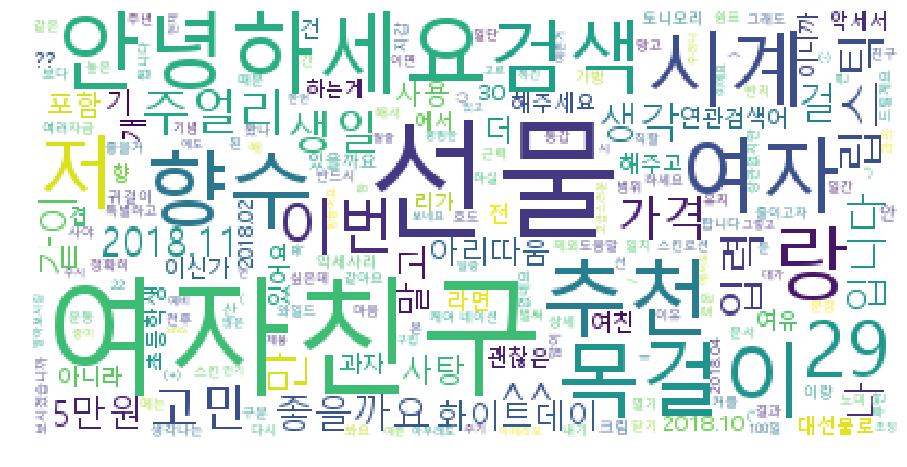

In [133]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [139]:
# 워드클라우드 배경으로 하트 이미지 세팅
mask = np.array(Image.open('data/09. heart.jpg'))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

image_colors

In [137]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

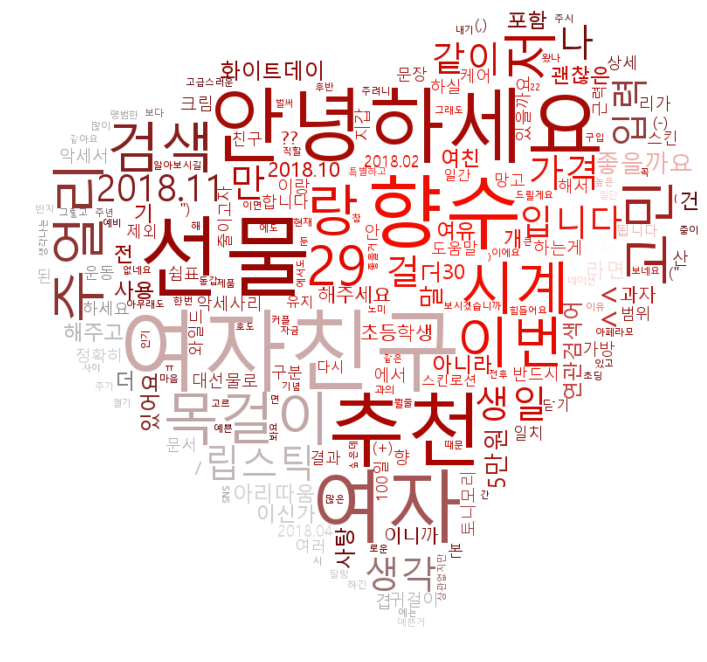

In [138]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

# gensim 이용해서 word2vec

- gensim install : pip install gensim

In [143]:
import gensim
from gensim.models import word2vec

In [142]:
twitter = Okt()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대다 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 때문 질문 드리다 2018.11 22 20 대다 후반 동갑 내기 커플 요 이번 1 주년 기념 여자친구 선물 해주다 싶다 일단 생각 하다 두다 건 반지 목걸이 같다 주얼리 이다 자금 많이 여유 건 아니다 답변 여자친구 선물 주얼리 생각 중 보다 아무래도 주얼리 가격 대가 여자친구 선물 주얼리 구입 생각 중이 시 라면 아페라모 한번 알아보다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 초등학생 여자친구 선물 안녕하다 2018.11 29 초등학생 여자친구 선물 안녕하다 현재 예비 중 1 평범하다 초딩 이다 이번 여자친구 생일 그런데 어떤 걸 주다 게 좋다 가격 2만원 5만원 대다 로 답변 ㅎㅎ 안녕하다 저 어리다 때 기

질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 보다 감 안 오다 2018.04 29 여친 선물 모 좋다 가방 지갑 신발 하다 아니다 던데 답변 안녕하다 여자친구 선물 가방 지갑 향수 악세다 리가 나다 싶다 여자 라면 다 좋아하다 한 선물 들 요 목걸이 귀걸이 어떻다 저 얼마 전 알다
질문 여자친구 선물 립스틱 산 크림 사주다 2018.04 09 여자친구 선물 립스틱 산 크림 사줄껀데 토니모리 아리따움 중 어느 게 더 좋다 립스틱 학교 땜시 연하다 개 좋다 늘다 같다 선크림 주근깨 쩌금 있다 답변 사람 보다 차이다 있다 아리따움 더 좋다 보다 두 브랜드 중 따다 립스틱 아리따움 더 종류 많다 색상 다양하다 썬크림 토니모리
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대다 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 때문 질문 드리다 2018.11 22 20 대다 후반 

질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 20 대 여자친구 선물 질문 이 2018.02 21 곧 20 대 여자친구 선물 하다 화이트데이 날 겹 치다 같이 주다 고해 사탕 이렇다 20 대 여자친구 선물 좋다 거 있다 답변 안녕하다 20 대 여자친구 선물 대하 문의 주다 화이트데이 20 대 여자친구 선물 겹 치다 좋다 20 대 여자친구 선물 좋다 보이다 향수 여러가지 있다
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 보다 감 안 오다 2018.04 29 여친 선물 모 좋다 가방 지갑 신발 하다 아니다 던데 답변 안녕하다 여자친구 선물 가방 지갑 향수 악세다 리가 나다 싶다 여자 라면 다 좋아하다 한 선물 들 요 목걸이 귀걸이 어떻다 저 얼마 전 알다
질문 여자친구 선물 립스틱 산 크림 사주다 2018.04 09 여자친구 선물 립스틱 산 크림 사줄껀데 토니모리 아리따움 중 어느 게 더 좋다 립스틱 학교 땜시 연하다 개 좋다 늘다 같다 선크림 주근깨 쩌금 있다 답변 사람 보다 차이다 있다 아리따움 더 좋다 보다 두 브랜드 중 따다 립스틱 아리따움 더 종류 많다 색상 다양하다 썬크림 토니모리
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일

질문 초등학생 여자친구 선물 안녕하다 2018.11 29 초등학생 여자친구 선물 안녕하다 현재 예비 중 1 평범하다 초딩 이다 이번 여자친구 생일 그런데 어떤 걸 주다 게 좋다 가격 2만원 5만원 대다 로 답변 ㅎㅎ 안녕하다 저 어리다 때 기억나다 이제 대학생 들어가다 만요 제 중학생 때 여자친구 선물 사 준 적 있다 제일 좋아하다 잠자다 때 끼다
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 20 대 여자친구 선물 질문 이 2018.02 21 곧 20 대 여자친구 선물 하다 화이트데이 날 겹 치다 같이 주다 고해 사탕 이렇다 20 대 여자친구 선물 좋다 거 있다 답변 안녕하다 20 대 여자친구 선물 대하 문의 주다 화이트데이 20 대 여자친구 선물 겹 치다 좋다 20 대 여자친구 선물 좋다 보이다 향수 여러가지 있다
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 보다 감 안 오다 2018.04 29 여친 선물 모 좋다 가방 지갑 신발 하다 아니다 던데 답변 안녕하다 여자친구 선물 가방 지갑 향수 악세다 리가 나다 싶다 여자 라면 다 좋아하다 한 

질문 여자친구 선물 때문 질문 드리다 2018.11 22 20 대다 후반 동갑 내기 커플 요 이번 1 주년 기념 여자친구 선물 해주다 싶다 일단 생각 하다 두다 건 반지 목걸이 같다 주얼리 이다 자금 많이 여유 건 아니다 답변 여자친구 선물 주얼리 생각 중 보다 아무래도 주얼리 가격 대가 여자친구 선물 주얼리 구입 생각 중이 시 라면 아페라모 한번 알아보다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 초등학생 여자친구 선물 안녕하다 2018.11 29 초등학생 여자친구 선물 안녕하다 현재 예비 중 1 평범하다 초딩 이다 이번 여자친구 생일 그런데 어떤 걸 주다 게 좋다 가격 2만원 5만원 대다 로 답변 ㅎㅎ 안녕하다 저 어리다 때 기억나다 이제 대학생 들어가다 만요 제 중학생 때 여자친구 선물 사 준 적 있다 제일 좋아하다 잠자다 때 끼다
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 20 대 여자친구 선물 질문 이 2018.02 21 곧 20 대 여자친구 선물 하다 화이트데이 날 겹 치

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대다 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 때문 질문 드리다 2018.11 22 20 대다 후반 동갑 내기 커플 요 이번 1 주년 기념 여자친구 선물 해주다 싶다 일단 생각 하다 두다 건 반지 목걸이 같다 주얼리 이다 자금 많이 여유 건 아니다 답변 여자친구 선물 주얼리 생각 중 보다 아무래도 주얼리 가격 대가 여자친구 선물 주얼리 구입 생각 중이 시 라면 아페라모 한번 알아보다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 초등학생 여자친구 선물 안녕하다 2018.11 29 초등학생 여자친구 선물 안녕하다 현재 예비 중 1 평범하다 초딩 이다 이번 여자친구 생일 그런데 어떤 걸 주다 게 좋다 가격 2만원 5만원 대다 로 답변 ㅎㅎ 안녕하다 저 어리다 때 기억나다 이제 대학생 들어가다 만요 제 중학생 때 여자친

질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 보다 감 안 오다 2018.04 29 여친 선물 모 좋다 가방 지갑 신발 하다 아니다 던데 답변 안녕하다 여자친구 선물 가방 지갑 향수 악세다 리가 나다 싶다 여자 라면 다 좋아하다 한 선물 들 요 목걸이 귀걸이 어떻다 저 얼마 전 알다
질문 여자친구 선물 립스틱 산 크림 사주다 2018.04 09 여자친구 선물 립스틱 산 크림 사줄껀데 토니모리 아리따움 중 어느 게 더 좋다 립스틱 학교 땜시 연하다 개 좋다 늘다 같다 선크림 주근깨 쩌금 있다 답변 사람 보다 차이다 있다 아리따움 더 좋다 보다 두 브랜드 중 따다 립스틱 아리따움 더 종류 많다 색상 다양하다 썬크림 토니모리
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대다 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 때문 질문 드리다 2018.11 22 20 대다 후반 

질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 20 대 여자친구 선물 질문 이 2018.02 21 곧 20 대 여자친구 선물 하다 화이트데이 날 겹 치다 같이 주다 고해 사탕 이렇다 20 대 여자친구 선물 좋다 거 있다 답변 안녕하다 20 대 여자친구 선물 대하 문의 주다 화이트데이 20 대 여자친구 선물 겹 치다 좋다 20 대 여자친구 선물 좋다 보이다 향수 여러가지 있다
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 보다 감 안 오다 2018.04 29 여친 선물 모 좋다 가방 지갑 신발 하다 아니다 던데 답변 안녕하다 여자친구 선물 가방 지갑 향수 악세다 리가 나다 싶다 여자 라면 다 좋아하다 한 선물 들 요 목걸이 귀걸이 어떻다 저 얼마 전 알다
질문 여자친구 선물 립스틱 산 크림 사주다 2018.04 09 여자친구 선물 립스틱 산 크림 사줄껀데 토니모리 아리따움 중 어느 게 더 좋다 립스틱 학교 땜시 연하다 개 좋다 늘다 같다 선크림 주근깨 쩌금 있다 답변 사람 보다 차이다 있다 아리따움 더 좋다 보다 두 브랜드 중 따다 립스틱 아리따움 더 종류 많다 색상 다양하다 썬크림 토니모리
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일

질문 초등학생 여자친구 선물 안녕하다 2018.11 29 초등학생 여자친구 선물 안녕하다 현재 예비 중 1 평범하다 초딩 이다 이번 여자친구 생일 그런데 어떤 걸 주다 게 좋다 가격 2만원 5만원 대다 로 답변 ㅎㅎ 안녕하다 저 어리다 때 기억나다 이제 대학생 들어가다 만요 제 중학생 때 여자친구 선물 사 준 적 있다 제일 좋아하다 잠자다 때 끼다
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 20 대 여자친구 선물 질문 이 2018.02 21 곧 20 대 여자친구 선물 하다 화이트데이 날 겹 치다 같이 주다 고해 사탕 이렇다 20 대 여자친구 선물 좋다 거 있다 답변 안녕하다 20 대 여자친구 선물 대하 문의 주다 화이트데이 20 대 여자친구 선물 겹 치다 좋다 20 대 여자친구 선물 좋다 보이다 향수 여러가지 있다
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 보다 감 안 오다 2018.04 29 여친 선물 모 좋다 가방 지갑 신발 하다 아니다 던데 답변 안녕하다 여자친구 선물 가방 지갑 향수 악세다 리가 나다 싶다 여자 라면 다 좋아하다 한 

질문 여자친구 선물 때문 질문 드리다 2018.11 22 20 대다 후반 동갑 내기 커플 요 이번 1 주년 기념 여자친구 선물 해주다 싶다 일단 생각 하다 두다 건 반지 목걸이 같다 주얼리 이다 자금 많이 여유 건 아니다 답변 여자친구 선물 주얼리 생각 중 보다 아무래도 주얼리 가격 대가 여자친구 선물 주얼리 구입 생각 중이 시 라면 아페라모 한번 알아보다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 초등학생 여자친구 선물 안녕하다 2018.11 29 초등학생 여자친구 선물 안녕하다 현재 예비 중 1 평범하다 초딩 이다 이번 여자친구 생일 그런데 어떤 걸 주다 게 좋다 가격 2만원 5만원 대다 로 답변 ㅎㅎ 안녕하다 저 어리다 때 기억나다 이제 대학생 들어가다 만요 제 중학생 때 여자친구 선물 사 준 적 있다 제일 좋아하다 잠자다 때 끼다
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 20 대 여자친구 선물 질문 이 2018.02 21 곧 20 대 여자친구 선물 하다 화이트데이 날 겹 치

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대다 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 때문 질문 드리다 2018.11 22 20 대다 후반 동갑 내기 커플 요 이번 1 주년 기념 여자친구 선물 해주다 싶다 일단 생각 하다 두다 건 반지 목걸이 같다 주얼리 이다 자금 많이 여유 건 아니다 답변 여자친구 선물 주얼리 생각 중 보다 아무래도 주얼리 가격 대가 여자친구 선물 주얼리 구입 생각 중이 시 라면 아페라모 한번 알아보다
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 초등학생 여자친구 선물 안녕하다 2018.11 29 초등학생 여자친구 선물 안녕하다 현재 예비 중 1 평범하다 초딩 이다 이번 여자친구 생일 그런데 어떤 걸 주다 게 좋다 가격 2만원 5만원 대다 로 답변 ㅎㅎ 안녕하다 저 어리다 때 기억나다 이제 대학생 들어가다 만요 제 중학생 때 여자친

질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 보다 감 안 오다 2018.04 29 여친 선물 모 좋다 가방 지갑 신발 하다 아니다 던데 답변 안녕하다 여자친구 선물 가방 지갑 향수 악세다 리가 나다 싶다 여자 라면 다 좋아하다 한 선물 들 요 목걸이 귀걸이 어떻다 저 얼마 전 알다
질문 여자친구 선물 립스틱 산 크림 사주다 2018.04 09 여자친구 선물 립스틱 산 크림 사줄껀데 토니모리 아리따움 중 어느 게 더 좋다 립스틱 학교 땜시 연하다 개 좋다 늘다 같다 선크림 주근깨 쩌금 있다 답변 사람 보다 차이다 있다 아리따움 더 좋다 보다 두 브랜드 중 따다 립스틱 아리따움 더 종류 많다 색상 다양하다 썬크림 토니모리
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대다 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 때문 질문 드리다 2018.11 22 20 대다 후반 

질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 20 대 여자친구 선물 질문 이 2018.02 21 곧 20 대 여자친구 선물 하다 화이트데이 날 겹 치다 같이 주다 고해 사탕 이렇다 20 대 여자친구 선물 좋다 거 있다 답변 안녕하다 20 대 여자친구 선물 대하 문의 주다 화이트데이 20 대 여자친구 선물 겹 치다 좋다 20 대 여자친구 선물 좋다 보이다 향수 여러가지 있다
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 보다 감 안 오다 2018.04 29 여친 선물 모 좋다 가방 지갑 신발 하다 아니다 던데 답변 안녕하다 여자친구 선물 가방 지갑 향수 악세다 리가 나다 싶다 여자 라면 다 좋아하다 한 선물 들 요 목걸이 귀걸이 어떻다 저 얼마 전 알다
질문 여자친구 선물 립스틱 산 크림 사주다 2018.04 09 여자친구 선물 립스틱 산 크림 사줄껀데 토니모리 아리따움 중 어느 게 더 좋다 립스틱 학교 땜시 연하다 개 좋다 늘다 같다 선크림 주근깨 쩌금 있다 답변 사람 보다 차이다 있다 아리따움 더 좋다 보다 두 브랜드 중 따다 립스틱 아리따움 더 종류 많다 색상 다양하다 썬크림 토니모리
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일

## 조사, 어미 제거한 후 데이터 저장 / 모델 저장

In [145]:
# 데이터 저장
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
     fp.write("\n".join(results))

In [146]:
# 모델 저장
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, 
                                                                        min_count=2, sg=1)
model.save('pres_girl.model')

## 데이터 load(읽기)

In [147]:
model = word2vec.Word2Vec.load("pres_girl.model")

## 단어와 유사한 단어 찾기

In [151]:
model.most_similar(positive=['선물'])

C:\Users\runia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자친구', 0.7920658588409424),
 ('목걸이', 0.3196719288825989),
 ('질문', 0.3080042004585266),
 ('추천', 0.2901689112186432),
 ('2018.02', 0.278735876083374),
 ('고르다', 0.2774319052696228),
 ('크다', 0.2773600220680237),
 ('고민', 0.2721559405326843),
 ('여러가지', 0.27123427391052246),
 ('20', 0.2646646201610565)]

In [161]:
model.most_similar(positive=['여자친구'])

C:\Users\runia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.7920658588409424),
 ('질문', 0.39680755138397217),
 ('크다', 0.3641693592071533),
 ('같이', 0.3585384488105774),
 ('고르다', 0.35834813117980957),
 ('만', 0.35738086700439453),
 ('추천', 0.3518374264240265),
 ('주기', 0.3459293246269226),
 ('좀', 0.3341616988182068),
 ('그래도', 0.31978797912597656)]

In [169]:
model.most_similar(positive=['목걸이'])

C:\Users\runia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자', 0.5840932130813599),
 ('모두', 0.5069449543952942),
 ('들', 0.5029308199882507),
 ('손목', 0.48481354117393494),
 ('차지', 0.44521641731262207),
 ('않다', 0.4378587007522583),
 ('경우', 0.42056483030319214),
 ('스킨', 0.39154481887817383),
 ('어떻다', 0.3894515633583069),
 ('일단', 0.38688910007476807)]

In [170]:
model.most_similar(positive=['여자친구', '목걸이'])

C:\Users\runia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.7218466401100159),
 ('손목', 0.4129658341407776),
 ('100일', 0.4048266112804413),
 ('여자', 0.4030994772911072),
 ('들', 0.4011085629463196),
 ('친구', 0.3656673729419708),
 ('와일드', 0.3638567328453064),
 ('운동', 0.36340996623039246),
 ('보통', 0.36038774251937866),
 ('경우', 0.35913628339767456)]

In [171]:
model.most_similar(positive=['여자친구', '향수'])

C:\Users\runia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.6266293525695801),
 ('안녕하다', 0.5228667259216309),
 ('질문', 0.45324456691741943),
 ('화이트데이', 0.45194315910339355),
 ('사탕', 0.4202383756637573),
 ('여러가지', 0.41885215044021606),
 ('2018.02', 0.4171900451183319),
 ('중반', 0.41624191403388977),
 ('깨끗하다', 0.40343549847602844),
 ('찾다', 0.3939601182937622)]

In [175]:
model.most_similar(positive=['제품', '선물'])

C:\Users\runia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('차다', 0.7349629402160645),
 ('고르다', 0.7348003387451172),
 ('힘들다', 0.728244960308075),
 ('SNS', 0.7263733744621277),
 ('주시', 0.7127971649169922),
 ('인기', 0.6940118074417114),
 ('여자친구', 0.6445761919021606),
 ('뭘줄', 0.5962415933609009),
 ('많다', 0.5175693035125732),
 ('고민', 0.47593361139297485)]